In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb

from google.colab import files
from io import BytesIO
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving 1a05740501151966bb060b623b24b010.jpg to 1a05740501151966bb060b623b24b010.jpg


In [ ]:
# преобразование изображения в формат lab
# и простая подготовка
# формат lab описывает кажный пиксель как яркостную и 2 цветовые компоненты
# lab - (L,a,b), где L принимает значения [0;100], а "а" и "б" [-128;127]
def process_image(img):
  image = img.resize((256,256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape

  #print(image.shape,"\n")
  #print(image[:2,:2,:],"\n")

  lab = rgb2lab(1.0/255*image) # заодно стандартизация значений в диапазон (0...1) но зачем? 1.0/255*
  X,Y = lab[:,:,0], lab[:,:,1:]

  #print(X.shape,"\t", Y.shape,"\n")
  #print(X[:4,:4],"\n")
  #print(Y[:4,:4,:],"\n")

  Y /= 128 # нормируем выходные значения?

  # тензоры размерностью (batch, x_image_size, y_image_size, channels)
  X = X.reshape(1,size[0],size[1],1)
  Y = Y.reshape(1,size[0],size[1],2)

  return X,Y,size

In [ ]:
X,Y,size = process_image(img)

In [ ]:


model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.1230
Epoch 2/50
1/1 [==============================] - 1s 674ms/step - loss: 0.8095
Epoch 3/50
1/1 [==============================] - 1s 700ms/step - loss: 0.8178
Epoch 4/50
1/1 [==============================] - 1s 674ms/step - loss: 0.8872
Epoch 5/50
1/1 [==============================] - 1s 666ms/step - loss: 0.8104
Epoch 6/50
1/1 [==============================] - 1s 703ms/step - loss: 0.8123
Epoch 7/50
1/1 [==============================] - 1s 665ms/step - loss: 0.8130
Epoch 8/50
1/1 [==============================] - 1s 662ms/step - loss: 0.8133
Epoch 9/50
1/1 [==============================] - 1s 670ms/step - loss: 0.8134
Epoch 10/50
1/1 [==============================] - 1s 688ms/step - loss: 0.8134
Epoch 11/50
1/1 [==============================] - 1s 691ms/step - loss: 0.8134
Epoch 12/50
1/1 [==============================] - 1s 689ms/step - loss: 0.8134
Epoch 13/50
1/1 [==============================] - 1

In [ ]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X, Y, size = process_image(img)

Saving 1a05740501151966bb060b623b24b010.jpg to 1a05740501151966bb060b623b24b010 (2).jpg


In [ ]:
output = model.predict(X)

1/1 [==============================] - 0s 303ms/step


In [ ]:
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

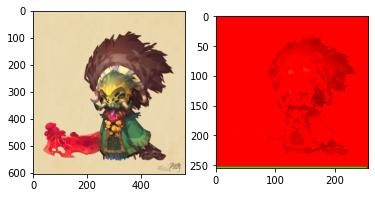

In [ ]:
cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab

fig, ax = plt.subplots(1,2)

ax[0].imshow(img)
ax[1].imshow(lab2rgb(cur))